In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
df_x = pd.read_csv(r"D:\SDA\Time-series-forecasting-of-Air-Quality-Prediction-main\train_x.csv")
df_y = pd.read_csv(r"D:\SDA\Time-series-forecasting-of-Air-Quality-Prediction-main\train_y.csv")
df_x1 = pd.read_csv(r"D:\SDA\Time-series-forecasting-of-Air-Quality-Prediction-main\test_x.csv")
df_y1 = pd.read_csv(r"D:\SDA\Time-series-forecasting-of-Air-Quality-Prediction-main\test_y.csv")

In [30]:
df_x.head(5)

,Date,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,01-01-2016,56.40,95.08,51.73,34.31,0.69,7.44,55.96,20.1,28.4,15.7,54.0,6.0,3.0
1,02-01-2016,53.69,93.92,73.09,54.77,0.76,8.67,34.06,20.8,28.3,12.9,45.0,6.3,1.1
2,03-01-2016,62.35,99.34,77.77,55.60,0.96,9.10,47.62,21.4,29.0,13.7,45.0,6.3,0.4
3,04-01-2016,64.96,104.62,77.07,50.81,0.89,8.87,50.62,21.5,29.0,15.2,47.0,6.9,2.2
4,05-01-2016,70.15,105.12,79.43,56.05,0.85,9.41,36.94,20.9,28.4,14.7,51.0,6.3,1.1


In [31]:
df_x1.head(5)

,Date,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,01-01-2020,30.71,70.80,27.31,26.74,1.07,8.56,37.39,22.0,27.2,19.2,75,6.9,3.3
1,02-01-2020,25.78,62.73,28.05,30.18,1.16,7.52,33.11,22.2,26.0,19.4,77,5.5,2.0
2,03-01-2020,29.66,69.62,26.26,26.92,0.99,6.40,32.98,23.4,28.4,19.4,68,6.9,3.5
3,04-01-2020,52.62,106.81,31.56,41.89,1.39,6.94,37.35,23.6,30.5,19.0,63,6.3,1.3
4,05-01-2020,52.64,97.94,29.10,29.52,1.01,7.01,45.10,24.2,30.5,20.4,63,6.3,1.3


In [32]:
df_y.head(5)

,Date,AQI
0,01-01-2016,101
1,02-01-2016,92
2,03-01-2016,108
3,04-01-2016,109
4,05-01-2016,114


In [33]:
df_y1.head(5)

,Date,AQI
0,01-01-2020,82
1,02-01-2020,81
2,03-01-2020,85
3,04-01-2020,95
4,05-01-2020,118


In [34]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1441 non-null   object 
 1   PM2.5     1441 non-null   float64
 2   PM10      1441 non-null   float64
 3   NO2       1441 non-null   float64
 4   NOx       1441 non-null   float64
 5   CO        1441 non-null   float64
 6   SO2       1441 non-null   float64
 7   O3        1441 non-null   float64
 8   temp      1441 non-null   float64
 9   max_temp  1441 non-null   float64
 10  min_temp  1441 non-null   float64
 11  humid     1441 non-null   float64
 12  visible   1441 non-null   float64
 13  wind      1441 non-null   float64
dtypes: float64(13), object(1)
memory usage: 157.7+ KB


In [35]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1441 non-null   object
 1   AQI     1441 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.6+ KB


In [36]:
df_x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      182 non-null    object 
 1   PM2.5     182 non-null    float64
 2   PM10      182 non-null    float64
 3   NO2       182 non-null    float64
 4   NOx       182 non-null    float64
 5   CO        182 non-null    float64
 6   SO2       182 non-null    float64
 7   O3        182 non-null    float64
 8   temp      182 non-null    float64
 9   max_temp  182 non-null    float64
 10  min_temp  182 non-null    float64
 11  humid     182 non-null    int64  
 12  visible   182 non-null    float64
 13  wind      182 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 20.0+ KB


In [37]:
df_y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    182 non-null    object
 1   AQI     182 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [38]:
df_x["Date"] = pd.to_datetime(df_x["Date"])
df_x1["Date"] = pd.to_datetime(df_x["Date"])

In [39]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1441 non-null   datetime64[ns]
 1   PM2.5     1441 non-null   float64       
 2   PM10      1441 non-null   float64       
 3   NO2       1441 non-null   float64       
 4   NOx       1441 non-null   float64       
 5   CO        1441 non-null   float64       
 6   SO2       1441 non-null   float64       
 7   O3        1441 non-null   float64       
 8   temp      1441 non-null   float64       
 9   max_temp  1441 non-null   float64       
 10  min_temp  1441 non-null   float64       
 11  humid     1441 non-null   float64       
 12  visible   1441 non-null   float64       
 13  wind      1441 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 157.7 KB


In [40]:
df_x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      182 non-null    datetime64[ns]
 1   PM2.5     182 non-null    float64       
 2   PM10      182 non-null    float64       
 3   NO2       182 non-null    float64       
 4   NOx       182 non-null    float64       
 5   CO        182 non-null    float64       
 6   SO2       182 non-null    float64       
 7   O3        182 non-null    float64       
 8   temp      182 non-null    float64       
 9   max_temp  182 non-null    float64       
 10  min_temp  182 non-null    float64       
 11  humid     182 non-null    int64         
 12  visible   182 non-null    float64       
 13  wind      182 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 20.0 KB


<AxesSubplot:>

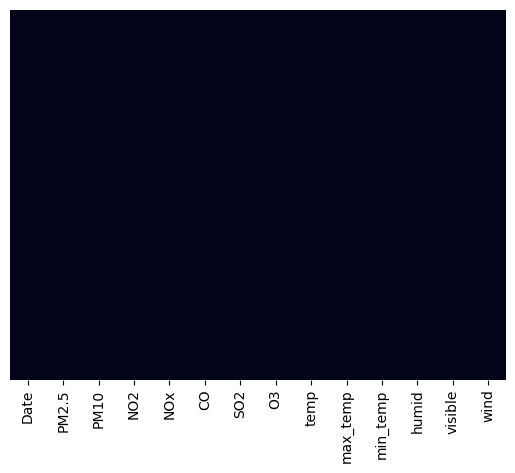

In [41]:
sns.heatmap(df_x.isnull(),cbar=False, yticklabels=False)

<AxesSubplot:>

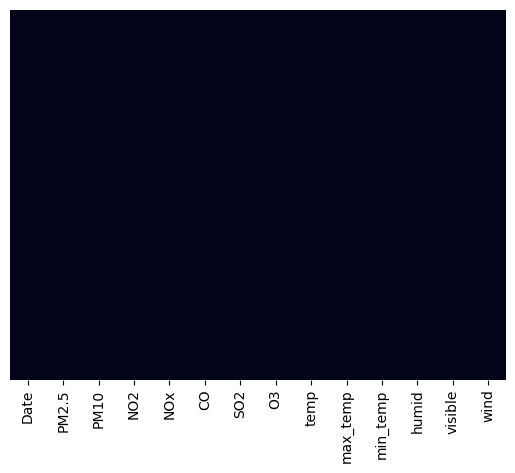

In [42]:
sns.heatmap(df_x1.isnull(),cbar=False, yticklabels=False)

In [43]:
x_train = df_x.drop(['Date'], axis = 1)
y_train = df_y["AQI"]
x_test = df_x1.drop(['Date'], axis = 1)
y_test = df_y1["AQI"]

In [44]:
x_train.head(5)

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,56.40,95.08,51.73,34.31,0.69,7.44,55.96,20.1,28.4,15.7,54.0,6.0,3.0
1,53.69,93.92,73.09,54.77,0.76,8.67,34.06,20.8,28.3,12.9,45.0,6.3,1.1
2,62.35,99.34,77.77,55.60,0.96,9.10,47.62,21.4,29.0,13.7,45.0,6.3,0.4
3,64.96,104.62,77.07,50.81,0.89,8.87,50.62,21.5,29.0,15.2,47.0,6.9,2.2
4,70.15,105.12,79.43,56.05,0.85,9.41,36.94,20.9,28.4,14.7,51.0,6.3,1.1


In [45]:
x_test.head(5)

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,30.71,70.80,27.31,26.74,1.07,8.56,37.39,22.0,27.2,19.2,75,6.9,3.3
1,25.78,62.73,28.05,30.18,1.16,7.52,33.11,22.2,26.0,19.4,77,5.5,2.0
2,29.66,69.62,26.26,26.92,0.99,6.40,32.98,23.4,28.4,19.4,68,6.9,3.5
3,52.62,106.81,31.56,41.89,1.39,6.94,37.35,23.6,30.5,19.0,63,6.3,1.3
4,52.64,97.94,29.10,29.52,1.01,7.01,45.10,24.2,30.5,20.4,63,6.3,1.3


In [46]:
y_train.head(5)

0    101
1     92
2    108
3    109
4    114
Name: AQI, dtype: int64

In [47]:
y_test.head(5)

0     82
1     81
2     85
3     95
4    118
Name: AQI, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [49]:
y_test[:5]

array([[-0.27610501],
       [-0.30227705],
       [-0.1975889 ],
       [ 0.06413148],
       [ 0.66608835]])

In [50]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [51]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([-0.42598554, -0.32285518, -0.37439079,  0.56889776,  0.35839957,
       -0.42909272, -0.57269681, -0.26245985,  0.01567518, -0.11107796,
       -0.3201579 , -0.21891784,  0.40783462,  0.7055259 ,  0.22467446,
        0.26276497,  0.0530263 , -0.43246711, -0.50525776, -0.15245656,
       -0.16199212, -0.16067006, -0.09474286,  0.01181052,  0.24484879,
        0.43669532,  0.50350427,  0.22400789,  0.36686281,  0.68480439,
        0.3759169 ,  0.16613001, -0.30412611, -0.2573071 , -0.17895698,
       -0.28220923,  0.22058164,  0.25126354,  0.13560886,  0.16879782,
       -0.27620943, -0.1923242 , -0.34181332, -0.07264204,  0.79413592,
        0.99305968,  0.03111798,  0.16207658,  0.31573778,  0.47359441,
        0.11195278, -0.22734235, -0.26313928,  0.01137933, -0.16588362,
        0.34505888,  0.20446714,  0.14924975,  0.16644536,  0.23590398,
        0.44577088,  0.74553677,  1.77404456,  0.98922567,  0.69407253,
        0.0452402 ,  0.08690373, -0.15631884, -0.03077091,  0.15

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.8062753220318156
mean_sqrd_error is  0.049344032022737905
Root mean squared error of is 0.22213516611004638
Mean Absolute error is 0.1667653692006438


In [53]:
y_test = sc_y.inverse_transform(y_test)
y_test[:5]

array([[ 82.],
       [ 81.],
       [ 85.],
       [ 95.],
       [118.]])

In [54]:
y_prediction1 = [[i] for i in y_prediction]
y_prediction1

[[-0.4259855386632836],
 [-0.3228551775335803],
 [-0.37439078648452284],
 [0.5688977599907634],
 [0.35839957440765824],
 [-0.4290927172013487],
 [-0.5726968130890837],
 [-0.26245984635281605],
 [0.015675177324094847],
 [-0.11107796176705942],
 [-0.3201579024776494],
 [-0.2189178380128478],
 [0.40783461888430045],
 [0.7055258992574598],
 [0.22467445782563217],
 [0.2627649739900347],
 [0.05302629891556332],
 [-0.4324671056219592],
 [-0.505257764978623],
 [-0.15245655770997613],
 [-0.16199212457674472],
 [-0.16067006357716695],
 [-0.09474286422177702],
 [0.01181052229110624],
 [0.2448487859621698],
 [0.43669532497490915],
 [0.5035042694690919],
 [0.22400789099829688],
 [0.3668628062491026],
 [0.6848043893920591],
 [0.3759168986186936],
 [0.16613001177289954],
 [-0.3041261064662151],
 [-0.25730709783729444],
 [-0.17895698149992567],
 [-0.2822092316224314],
 [0.22058164275162528],
 [0.2512635389546911],
 [0.13560886488482637],
 [0.1687978218358236],
 [-0.2762094281392502],
 [-0.192324204801

In [55]:
y_prediction = sc_y.inverse_transform(y_prediction1)
y_prediction[:5]

array([[ 76.27325713],
       [ 80.21373598],
       [ 78.24462645],
       [114.28647223],
       [106.24360648]])

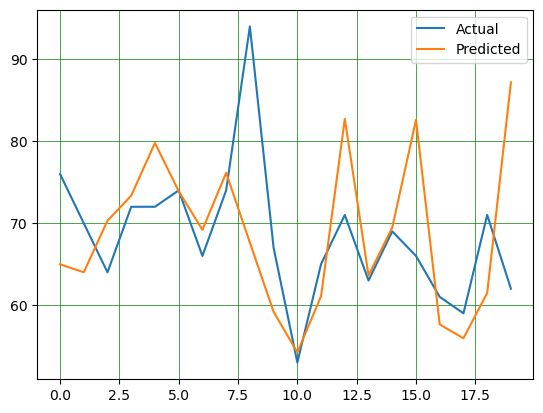

In [56]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [57]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,82.0,76.273257,5.726743,6.983833
1,81.0,80.213736,0.786264,0.970696
2,85.0,78.244626,6.755374,7.947498
3,95.0,114.286472,-19.286472,20.301550
4,118.0,106.243606,11.756394,9.963045
5,81.0,76.154536,4.845464,5.982055
6,75.0,70.667607,4.332393,5.776523
7,93.0,82.521364,10.478636,11.267350
8,101.0,93.148547,7.851453,7.773716
9,94.0,88.305472,5.694528,6.058009
